In [ ]:
# %pip install google-colab

import pickle
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy.signal import find_peaks

In [ ]:
s01_eeg_df_data=[]


for i in range(1,33):
  I=str(i).zfill(2)

  File= '/content/gdrive/My Drive/Colab Notebooks/Copy of data_preprocessed_python/s'+I+'.dat'

  with open(File, 'rb') as File: 
    s01 = pickle.load(File, encoding='latin1')

  s01_data=s01['data']
  s01_labels=s01['labels']

  s01_data_cleaned=[[s01_data[j][i][(128*3):].copy() for i in range(40)]for j in range(40)]


  import math as m
  # Bin=lambda x: m.floor(x/5)

  # s01_labels=[list(map(Bin,s01_labels[i]))for i in range(40)]


  # Int=lambda x: int(x)
  # s01_labels=[list(map(Int,s01_labels[i]))for i in range(40)]

  s01_labels=[list(s01_labels[i])for i in range(40)]



  Chunk=128
  n=1
  Time=3

  s01_eeg_peaks=[[] for _ in range(40)]

  s01_eeg_data=[[[] for _ in range(32)] for i in range(40)]

  for i in range(40):
      s01_eeg_peaks[i].extend(find_peaks(s01_data_cleaned[i][36],prominence=10000)[0].tolist())
      # s01_eeg_peaks[i].extend(find_peaks(-s01_data_cleaned[i][36],prominence=10000)[0].tolist())

  def average(arr, n):
      remainder = len(arr) % n
      if remainder == 0:
          avg = np.mean(arr.reshape(-1, n), axis=1)
          return avg
      else:
          avg_head = np.mean(arr[:-remainder].reshape(-1, n), axis=1)
          avg_tail = np.mean(arr[-remainder:])
          return np.append(avg_head, avg_tail)

  for j in range(40):
    for i in range(32):
      for k in s01_eeg_peaks[j]:
        s01_eeg_data[j][i].append(average(s01_data_cleaned[j][i][k-int(Time/2*Chunk):k+int(Time/2*Chunk)],n))

  s01_eeg_data_final=[[[] for _ in range(32)] for i in range(40)]

  for j in range(40):
    for i in range(32):
      for k in s01_eeg_data[j][i]:
        s01_eeg_data_final[j][i].append(scale(k))

  for j in range(40):
    for k in range(len(s01_eeg_peaks[j])):
      s01_eeg_df_data.append([s01_eeg_data_final[j][i][k] for i in range(32)]+s01_labels[j])



s01_eeg_df=pd.DataFrame(s01_eeg_df_data,columns=['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO3', 
                                                'O1', 'Oz', 'Pz', 'Fp2','AF4', 'Fz', 'F4', 'F8', 'FC6', 
                                                'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']+['Valence', 'Arousal', 'Dominance', 'Liking'])
s01_labels_df=s01_eeg_df[['Valence', 'Arousal', 'Dominance', 'Liking']]


# flatten = lambda l: [item for sublist in l for item in sublist]

# Drop=[]
# for i in range(len(s01_eeg_df)):
#   if(len(flatten(list(s01_eeg_df.iloc[i,:-4])))<(np.ceil(Time*Chunk/n)*32)):
#     Drop.append(i)
    
# s01_eeg_df.drop(Drop,inplace=True)

# s01_eeg_df.reset_index(drop=True,inplace=True)


drive.mount('/drive')

s01_eeg_df.to_csv('/drive/My Drive/Colab Notebooks/EEG Database.csv',index=False)

s01_eeg_df

Mounted at /drive


,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,P3,P7,PO3,O1,Oz,Pz,Fp2,AF4,Fz,F4,F8,FC6,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Valence,Arousal,Dominance,Liking
0,"[0.899769114092967, -0.5647798033702689, -1.52...","[1.3897665455179888, 0.23488443127542863, -1.0...","[1.3674827460948995, 0.1991872589566344, -1.02...","[0.8478069916789474, -1.0258397917707036, -2.1...","[1.3481566180736242, -0.5750385164210363, -1.9...","[1.992407731929436, 0.9877600372001284, -0.343...","[1.277706300509624, -0.030737567284929018, -1....","[-1.3434130597577107, -1.8347715494401122, -1....","[-0.32519815765563304, -1.6975645390369034, -1...","[0.3521684614659968, -0.17733479982411107, -1....","[-0.9453697898813138, -0.46021258928950043, -0...","[-1.4288695156730509, -1.111694260059082, -0.2...","[-1.0341653709503316, 0.06145480436933731, 0.2...","[-0.4963420799329065, 0.05845439491554184, -0....","[-0.9042256935429365, 0.06112524736209893, 0.3...","[-0.37652967584924685, 0.5709769817962014, -0....","[0.30279538324916755, -0.31987267138557546, -0...","[0.011946564867582964, 0.3510365410275573, 0.5...","[0.589860131460357, 0.5826427180467711, 0.2302...","[0.36673690047571456, 0.6070422970498822, 0.97...","[-0.31759780553076017, -0.656145587713396, 0.3...","[0.26597337234972657, 0.584108825831677, 1.588...","[0.937926996770334, 0.8962363559255586, 1.2173...","[0.8550145809621498, 1.560679690702864, 1.3020...","[-0.36784788519929396, 0.756526487861923, 1.78...","[-0.5327809242674799, -0.5376965092806938, 0.2...","[-0.5622127699654114, -0.13781784880115713, 0....","[0.3307834449913444, 1.2208504126689976, 1.621...","[-0.5960717815362477, 0.8291493469682145, 1.21...","[-0.6304219901045844, -0.2101904604407549, 0.4...","[-0.4654051388494978, 0.5675575004867108, 0.99...","[-0.6734106372922791, 0.3245523115312958, 0.46...",7.71,7.60,6.90,7.83
1,"[1.543227203602175, 0.7829901232104153, -0.812...","[1.7228528315125635, 0.9584394815545673, -0.60...","[2.2230381642967316, 1.3661723110429944, 0.042...","[0.1079795296048794, 0.189143272812222, 0.0535...","[0.5286647345986196, 0.7715814938437937, 0.484...","[2.3837937239875324, 1.9999840780081972, 1.126...","[0.18260339799121836, 1.3851861829755783, 1.64...","[-0.292285499201633, 0.7388882402175088, 0.421...","[-1.0400898680538289, 0.1455907255670158, 1.25...","[-0.3657106908157561, 0.1503940710914267, 0.69...","[-1.9487691003725627, -1.0968472838757366, 0.6...","[-1.6768540732537802, -0.36209371833619086, 0....","[-2.244831590280039, -1.230048271992239, 1.014...","[-1.9320322851015628, -0.8121185704630679, 0.9...","[-1.747176666933468, -0.7273310930137699, 1.21...","[-1.7706212840031716, -1.3496035619859341, 0.1...","[1.3587318135426276, 0.8275462151085123, -0.30...","[1.875171933854477, 0.7524382366454664, -0.593...","[2.096580853823111, 1.048911346199528, -0.5506...","[1.473637760144837, 0.21370325875090027, -1.04...","[1.5795587461627887, 0.7806014879518982, -0.26...","[1.4381998241153584, 0.40656414935214136, -1.4...","[2.1581751804299936, 0.7862903483196741, -0.97...","[0.5496695494211972, 0.09622598399705964, -0.6...","[0.9222166389130052, -0.5543667783901638, -2.0...","[0.32527631486800856, -0.47796920320685854, -0...","[-0.15521286267487525, -0.9552628971605915, -1...","[-0.8110866683916459, -1.0881033338096031, -0....","[-1.1824170437382868, -1.293290309843761, -0.4...","[-0.6401286525758333, -0.6895759814576886, -0....","[-1.566615904006958, -0.988281365303418, 0.215...","[-1.7574164866845574, -0.8619570331920857, 0.7...",8.10,7.31,7.28,8.47
2,"[0.44366059838774374, -1.5388837020041228, -2....","[-0.04412507652054703, -0.6166805045451584, -1...","[-0.045495748732269074, -0.28461602360342875, ...","[0.6494521701214578, 1.3839673399732804, 0.165...","[0.49172174713961514, 0.644223720399112, 0.372...","[0.0764123319684159, -0.045411954187930405, -0...","[0.7268312346609083, 0.8189469184703867, 0.167...","[0.7326924301727399, -0.8518656670639496, -0.6...","[1.0870216657198366, 1.0071764751980918, 0.819...","[-0.426966335

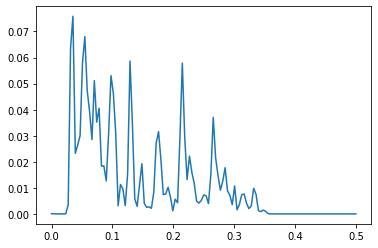

In [ ]:
from scipy.signal import welch
X, Y= welch(s01_eeg_df.iloc[263,0],scaling='spectrum')
plt.plot(X, Y)